**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

In [1]:
import pandas as pd
import pylab as pl
import statsmodels.api as st
import scipy as sp 
from scipy import stats
import seaborn  as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to be reproducible.

In [2]:
#reading in file from github. note that you must use the link to the raw data!
furl = 'https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/HW5_fb55/World' +\
    '%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv'
guns = pd.read_csv(furl)

In [3]:
guns.columns

Index([u'Country/Territory', u'ISO code', u'Source',
       u'% of homicides by firearm', u'Number of homicides by firearm',
       u'Homicide by firearm rate per 100,000 pop',
       u'Rank by rate of ownership', u'Average firearms per 100 people',
       u'Average total all civilian firearms'],
      dtype='object')

In [4]:
guns.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


from the worldbank website I look for the right indicator: GDP and find the link to the GDP (current US$). By clicking on the indicator I get a page with a download csv link. The World bank also has an API, with a python data reader
http://pandas-docs.github.io/pandas-docs-travis/ecosystem.html#pandas-datareader

In [5]:
!pip install --user pandas-datareader

In [6]:
from pandas_datareader import wb

wb.search('gdp.*US*').iloc[:,:2]

,id,name
682,6.0.GDP_current,GDP (current $)
683,6.0.GDP_growth,GDP growth (annual %)
688,6.1.2_GDP.PPP,GDP (2011 USD PPP)
4860,EG.GDP.PUSE.KO.87,GDP per unit of energy use (1987 US$ per kg of...
4861,EG.GDP.PUSE.KO.KD,GDP per unit of energy use (2000 US$ per kg of...
4862,EG.GDP.PUSE.KO.PP,GDP per unit of energy use (PPP $ per kg of oi...
4863,EG.GDP.PUSE.KO.PP.KD,GDP per unit of energy use (constant 2011 PPP ...
4994,ER.GDP.FWTL.M3.KD,"Water productivity, total (constant 2010 US$ G..."
5011,EU.EGY.USES.GDP,GDP per unit of energy use (1987 US$ per kg of...
7709,NA.GDP.AGR.CR,"GDP on Agriculture Sector (in IDR Million), Cu..."


In [7]:
gdp = wb.download(indicator='NY.GDP.MKTP.CD', country='all', start=2012, end=2012)
gdp.head()

,,NY.GDP.MKTP.CD
country,year,
Arab World,2012,2.740536e+12
Caribbean small states,2012,6.786056e+10
Central Europe and the Baltics,2012,1.350779e+12
Early-demographic dividend,2012,9.956217e+12
East Asia & Pacific,2012,2.101311e+13


In [8]:
#same for population, though there are very many populatin files so it requires a buit of a harder search. 
# Finally I am able to visualize it after removing the first couple hundred entries. 
#The name of the direct download file helps the search
wb.search('POP.*TOTL*').iloc[270:,:2]

,id,name
10559,SP.POP.AG05.TO.UN,"Population, age 5, total"
10564,SP.POP.AG06.TO.UN,"Population, age 6, total"
10569,SP.POP.AG07.TO.UN,"Population, age 7, total"
10574,SP.POP.AG08.TO.UN,"Population, age 8, total"
10579,SP.POP.AG09.TO.UN,"Population, age 9, total"
10584,SP.POP.AG10.TO.UN,"Population, age 10, total"
10589,SP.POP.AG11.TO.UN,"Population, age 11, total"
10594,SP.POP.AG12.TO.UN,"Population, age 12, total"
10599,SP.POP.AG13.TO.UN,"Population, age 13, total"
10604,SP.POP.AG14.TO.UN,"Population, age 14, total"


In [9]:
pop = wb.download(indicator='SP.POP.TOTL', country='all', start=2012, end=2012)
pop.head()

,,SP.POP.TOTL
country,year,
Arab World,2012,3.733070e+08
Caribbean small states,2012,7.074129e+06
Central Europe and the Baltics,2012,1.039353e+08
Early-demographic dividend,2012,2.996573e+09
East Asia & Pacific,2012,2.235430e+09


last file is the guns per person. The link in the page I pointed you to is a link to a downloader. There are APIs that allow you to interact with the downloader, but **if it gets too complicated** (and only in that case) it is fair to state the data source in detail, access date and time (since it may be then different than the last time the notebook was run!), and download by hand

** DATA SOURCE FOR NUMBER OF MASS SHOOTINGS: **
The number of mass shooting is extracted from a [Creative Commons](https://creativecommons.org/licenses/by-nd/4.0/). The file can be accessed through [this link](https://datawrapper.dwcdn.net/pvLFI/4/) (which leads to this download statement for data-wrapper:  data:application/octet-stream;charset=utf-8,Country%2CGuns%2F100%20inhabitants%2CNumber%20of%20mass%20shootings%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABeligium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78)

Publication date is unknown, accessed on October 14, 2017 10:04AM and saved locally as data-pvLFI.csv

(note: if I accessed this first I would only have to query a subset of countries from the worldbank database which may be a smart idea to limit download and memory)

In [10]:
ms = pd.read_csv("data-pvLFI.csv")
ms.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [11]:
gdp

,,NY.GDP.MKTP.CD
country,year,
Arab World,2012,2.740536e+12
Caribbean small states,2012,6.786056e+10
Central Europe and the Baltics,2012,1.350779e+12
Early-demographic dividend,2012,9.956217e+12
East Asia & Pacific,2012,2.101311e+13
East Asia & Pacific (excluding high income),2012,1.073815e+13
East Asia & Pacific (IDA & IBRD countries),2012,1.071738e+13
Euro area,2012,1.263759e+13
Europe & Central Asia,2012,2.227831e+13


In [12]:
gdp_all = gdp.merge(pop, right_index=True, left_index=True)
gdp_all.rename(columns = {u'NY.GDP.MKTP.CD':'gdp', u'SP.POP.TOTL': 'pop'}, inplace=True)
gdp_all.index = gdp_all.index.droplevel(1)
gdp_all

,gdp,pop
country,,
Arab World,2.740536e+12,3.733070e+08
Caribbean small states,6.786056e+10,7.074129e+06
Central Europe and the Baltics,1.350779e+12,1.039353e+08
Early-demographic dividend,9.956217e+12,2.996573e+09
East Asia & Pacific,2.101311e+13,2.235430e+09
East Asia & Pacific (excluding high income),1.073815e+13,1.993009e+09
East Asia & Pacific (IDA & IBRD countries),1.071738e+13,1.968120e+09
Euro area,1.263759e+13,3.361673e+08
Europe & Central Asia,2.227831e+13,8.946667e+08


In [13]:
df_ = guns.merge(gdp_all, right_index=True, 
                 left_on="Country/Territory")[["Country/Territory",
                                               'Average total all civilian firearms', 
                                               "pop",
                                               "gdp",
                                               "Number of homicides by firearm"]].rename(columns={"Country/Territory":"Country"})
df_.head()

//anaconda/lib/python2.7/site-packages/pandas/tools/merge.py:1324: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  rlab = rizer.factorize(rk)


,Country,Average total all civilian firearms,pop,gdp,Number of homicides by firearm
0,Albania,270000.0,2900401.0,1.231978e+10,56.0
1,Algeria,1900000.0,37565847.0,2.090474e+11,20.0
2,Angola,2800000.0,25096150.0,1.153984e+11,NaN
4,Argentina,3950000.0,42096739.0,5.459824e+11,1198.0
5,Armenia,380000.0,2881922.0,1.061932e+10,9.0


In [14]:
df_ = df_.merge(ms, on="Country")

### Checking how much data was lost in the merge process


In [15]:
ms.shape, df_.shape

((25, 3), (22, 7))

In [16]:
ms[~ms['Country'].isin(df_['Country'])]


,Country,Guns/100 inhabitants,Number of mass shootings
2,Beligium,17.2,2
9,Holland,3.9,2
23,United Kingdom,6.2,3


#### Belgium
Belgium is typed as Beligium in the mass shootings dataframe. I will correc that

In [17]:
ms.set_value?

In [18]:
ms = ms.set_value(2, "Country", 'Belgium')

#### Holland
Holland should appear as Netherlands (Holland is a. region in the Netherlands). I will check that the Netherlands are in the gdp df and change the name in the mass shooting df

In [19]:
gdp_all[[c.startswith('N') for c in gdp_all.index.values]]

,gdp,pop
country,,
North America,1.798508e+13,348813722.0
Not classified,NaN,NaN
Namibia,1.301627e+10,2263934.0
Nauru,1.038120e+08,10279.0
Nepal,1.885151e+10,27649925.0
Netherlands,8.289468e+11,16754962.0
New Caledonia,NaN,259000.0
New Zealand,1.761929e+11,4408100.0
Nicaragua,1.053200e+10,5877108.0


In [20]:
ms = ms.set_value(9, "Country", 'Netherlands')

#### United Kingdom
Turns out the UK is not in the guns df so I will lose it. 

In [21]:
### Redo the last 2 merges
df_ = guns.merge(gdp_all, right_index=True, 
                 left_on="Country/Territory")[["Country/Territory",
                                               'Average total all civilian firearms', 
                                               "pop",
                                               "gdp",
                                               "Number of homicides by firearm"]].rename(columns={"Country/Territory":"Country"})
df_ = df_.merge(ms, on="Country")

In [22]:
ms.shape, df_.shape
ms[~ms['Country'].isin(df_['Country'])]


,Country,Guns/100 inhabitants,Number of mass shootings
23,United Kingdom,6.2,3


In [23]:
#converting to float since it is safer to do math with 
ms['Number of mass shootings'] = ms['Number of mass shootings'].apply(lambda x: float(x))

In [24]:
ms.drop(["Guns/100 inhabitants"], axis=1, inplace=True)


In [25]:
ms.head()

,Country,Number of mass shootings
0,Australia,4.0
1,Austria,1.0
2,Belgium,2.0
3,Canada,4.0
4,Denmark,0.0


The 4 cells of code below are the merge in case you download the world bank files locally.

In [ ]:
#note: If I had downloaded the WorldBank files and saved locally they would have a differentformat: 
gdp.columns

In [ ]:
gdpall = gdp.merge(pop[[u'Country Name','2012']], on=u'Country Name')

In [ ]:
gdpall = gdpall[[u'Country Name','2012_x', '2012_y']]
gdpall.rename(columns = {u'2012_x': 'gdp', u'2012_y': "pop"}, inplace=True)
gdpall.columns

In [ ]:
df_ = guns.merge(gdpall[[u'Country Name', 'pop', 'gdp']], right_on="Country Name", 
                 left_on="Country/Territory")[["Country Name",
                                               'Average total all civilian firearms', 
                                               "pop",
                                               "gdp",
                                               "Number of homicides by firearm"]].rename(columns={"Country Name":"Country"})

In [26]:
df_.head()

,Country,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Guns/100 inhabitants,Number of mass shootings
0,Australia,3050000.0,22728254.0,1.538194e+12,30.0,15.0,4
1,Austria,2500000.0,8429991.0,4.074516e+11,18.0,30.4,1
2,Belgium,1800000.0,11128246.0,4.978841e+11,70.0,17.2,2
3,Canada,9950000.0,34750545.0,1.824289e+12,173.0,30.8,4
4,Denmark,650000.0,5591572.0,3.271489e+11,15.0,12.0,0


In [27]:
df_.describe()

,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Guns/100 inhabitants,Number of mass shootings
count,2.400000e+01,2.400000e+01,2.400000e+01,24.000000,24.000000,24.000000
mean,1.502438e+07,3.753117e+07,1.706438e+12,436.833333,22.958333,4.833333
std,5.465004e+07,6.654550e+07,3.386945e+12,1857.147244,19.106200,15.705625
min,7.000000e+04,3.207160e+05,1.421858e+10,0.000000,0.600000,0.000000
25%,6.275000e+05,5.547172e+06,2.407078e+11,14.000000,9.950000,0.000000
50%,2.100000e+06,1.077993e+07,5.050246e+11,32.500000,19.850000,1.000000
75%,3.675000e+06,4.024064e+07,1.609718e+12,60.250000,30.900000,2.250000
max,2.700000e+08,3.139984e+08,1.615526e+13,9146.000000,88.800000,78.000000


# exploration

lets begin by printing three-sigma outliers. that is a standard cut to identify outliers

In [28]:
df_[df_["Number of homicides by firearm"] > df_["Number of homicides by firearm"].mean() + 
    3.0 * df_["Number of homicides by firearm"].std()]

,Country,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Guns/100 inhabitants,Number of mass shootings
23,United States,270000000.0,313998379.0,1.615526e+13,9146.0,88.8,78


In [29]:
df_[df_["Number of mass shootings"] > df_["Number of mass shootings"].mean() + 
    3.0 * df_["Number of mass shootings"].std()]

,Country,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Guns/100 inhabitants,Number of mass shootings
23,United States,270000000.0,313998379.0,1.615526e+13,9146.0,88.8,78


In [30]:
df_[df_["Average total all civilian firearms"] > df_["Average total all civilian firearms"].mean() + 
    3.0 * df_["Average total all civilian firearms"].std()]

,Country,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Guns/100 inhabitants,Number of mass shootings
23,United States,270000000.0,313998379.0,1.615526e+13,9146.0,88.8,78


## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?

I am plotting with the mpld3  which offers minimal plot interactivity within the notebook: for example the row label (country name) will appear on hover, which is helpful to visually identify "outliers". This is not required or necessary of course. Once ponts away from the core of the distribution are seen in the plot the corresponding row can be extracted from the dataframe by cutting the dataframe at relevant variable values (broadcasting/slicing in python parlance)

In [31]:
import mpld3
fig, ax = plt.subplots()

scatter = ax.scatter(df_.gdp * 1e-12, df_['Number of mass shootings'])
ax.errorbar(df_.gdp * 1e-12, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in tillion $)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
labels = ['{0}, {1}'.format(c, n) for c,n in zip(df_["Country"].values, df_["Number of mass shootings"].values)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)
mpld3.display()

Figure 1: Scatter plot of number of mass shootings as a function of GDP for all country available in the . 
An obvious outlier on the top right quadrant of the plot, with both high GDP and high number of mass shootings is the USA.  Errorbars are Poisson statistics on the dependent variable, number of mass shootings, only. 

The obvious outlier, in both GDP and mass shootings is the USA. 

In [32]:
df_[df_.gdp > 10e12]

,Country,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Guns/100 inhabitants,Number of mass shootings
23,United States,270000000.0,313998379.0,1.615526e+13,9146.0,88.8,78


In [33]:
df_[df_["Number of mass shootings"] > 10]

,Country,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Guns/100 inhabitants,Number of mass shootings
23,United States,270000000.0,313998379.0,1.615526e+13,9146.0,88.8,78


The USA has a large population, so a more indicative quantity may be the number of mass shootings per person vs GDP per person. NOTE: While the ratio of mass shooting to GDP will remain the same for each country (that is the angle of the line that connects the datapoint to the origin) the distribution of points should change. 

In [34]:
fig, ax = plt.subplots()

scatter = ax.scatter(df_.gdp / df_['pop'], df_['Number of mass shootings'] / df_['pop'] * 1e7)
ax.errorbar(df_.gdp / df_['pop'], df_['Number of mass shootings'] / df_['pop'] * 1e7, 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0) / df_['pop'] * 1e7, fmt = '.')
ax.set_xlabel("GDP per person")
ax.set_ylabel("Number of mass shooting per person - multiplied by 1e7")
labels = ['{0}, {1}'.format(c, n) for c,n in zip(df_["Country"].values, df_["Number of mass shootings"].values)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)
mpld3.display()

Figure 2:  Scatter plot of number of mass shootings per person as a function of GDP per person.     
Errorbars are still Poisson statistics on the absolute number of mass shootings only. 
The USA is now in the core of the distribution. New Zealand is now the outlier at high number of mass shootings per person, but with a large uncertainty on the number of mass shootings because of the low original absolute number of shooting (3) which has a Poisson uncertainty of 60% on its value.


## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [35]:
df_['Average total all civilian firearms'].head()

0    3050000.0
1    2500000.0
2    1800000.0
3    9950000.0
4     650000.0
Name: Average total all civilian firearms, dtype: float64

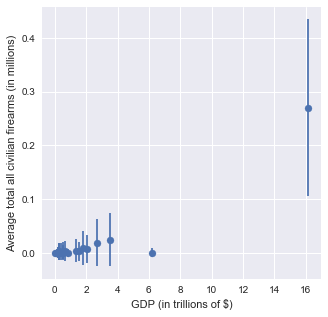

In [36]:
ax = pl.figure(figsize(5,5)).add_subplot(111)

scatter = ax.scatter(df_.gdp * 1e-12, 
        df_['Average total all civilian firearms'] * 1e-9)
ax.errorbar(df_.gdp * 1e-12, 
        df_['Average total all civilian firearms'] * 1e-9,
           yerr = np.sqrt(df_['Average total all civilian firearms']) * 1e-5, 
                         fmt='.')
ax.set_xlabel("GDP (in trillions of $)")
ax.set_ylabel("Average total all civilian firearms (in millions)")
#labels = ['{0}, {1}'.format(c, n) for c,n in zip(df_["Country"].values, df_["Average total all civilian firearms"].values)]
#tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
#mpld3.plugins.connect(fig, tooltip)
#mpld3.display()

Figure 3: Scatter plot of number of civilian fire arms as a function of GDP for all country available in the mass shootings dataset (except UK). Errorbars inflated by a factor 10,000 for visibility are from Poisson statistics on number of civilian fire arms alone.
An obvious outlier on the top right quadrant of the plot, with both high GDP and high number of mass shootings is the USA.  

In [37]:
fig, ax = plt.subplots()

scatter = ax.scatter(df_.gdp / df_['pop'], 
        df_['Average total all civilian firearms'] / df_['pop'])
ax.errorbar(df_.gdp / df_['pop'], 
        df_['Average total all civilian firearms'] / df_['pop'],
           yerr = np.sqrt(df_['Average total all civilian firearms'] / df_['pop']), 
                         fmt='.')
ax.set_xlabel("GDP per person")
ax.set_ylabel("Average total all civilian firearms per person")
labels = ['{0}, {1}'.format(c, n) for c,n in zip(df_["Country"].values, df_["Average total all civilian firearms"].values)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)
mpld3.display()

Figure 4: As figure 2, but for average number of fire arms against GDP. 
The US remains at the edge of the distribution with the highest number of fire arms per person, though consistent within Poisson uncertainties with the rest of the distribution.

In [38]:
df_[df_['Average total all civilian firearms'] / df_['pop'] > 0.6] 

,Country,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Guns/100 inhabitants,Number of mass shootings
23,United States,270000000.0,313998379.0,1.615526e+13,9146.0,88.8,78


## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

In [39]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3

,Country,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Guns/100 inhabitants,Number of mass shootings,shootingspp
23,United States,270000000.0,313998379.0,1.615526e+13,9146.0,88.8,78,0.000248


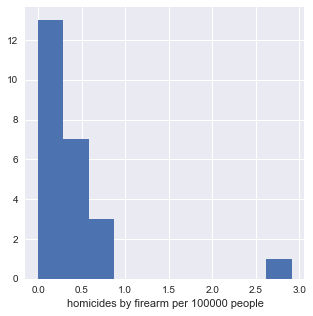

In [40]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 100000)
ax.set_xlabel('homicides by firearm per 100000 people');
df_[df_['Number of homicides by firearm'] / df_['pop'] > 2.5 / 100000]

Figure 5: distrubution of number of homicides by fire arm per person (per 100,000 people). The outlier in the tail of the distribuion is again the USA. 

In [41]:
fig, ax = plt.subplots()

scatter = ax.scatter(df_.gdp / df_['pop'], df_['Number of homicides by firearm'] / df_['pop'] * 1e5)
ax.errorbar(df_.gdp / df_['pop'], df_['Number of homicides by firearm'] / df_['pop'] * 1e5, 
            yerr = np.sqrt(df_['Number of homicides by firearm'] * 1.0) / df_['pop'] * 1e5, fmt = '.')
ax.set_xlabel("GDP per person")
ax.set_ylabel("Number of homicides by firearm per person x 100,000")
labels = ['{0}, {1}'.format(c, n) for c,n in zip(df_["Country"].values, df_["Number of homicides by firearm"].values)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)
mpld3.display()


Figure 6: as Figure 2 and 4 for number of homicides by fire arms per person against GDP per person. The USA is the outlier on the top, with GDP per person near the median value, but substantially higher number of homicides per person. Poissonian errorbars accounting only for the count statistics in the number of homicides.

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color

In [42]:
fig, ax = plt.subplots()

scatter = ax.scatter(df_[u'Average total all civilian firearms'] / df_['pop'], 
                     df_['Number of homicides by firearm'] / df_['pop'] * 1e5, alpha = 0.5)

ax.errorbar(df_[u'Average total all civilian firearms'] / df_['pop']  , 
            df_['Number of homicides by firearm'] / df_['pop'] * 1e5, 
            yerr = np.sqrt(df_['Number of homicides by firearm'] * 1.0) 
            / df_['pop'] * 1e5, fmt = '.', alpha =0.51)
labels = ['{0}, {1}'.format(c, n) for c,n in zip(df_["Country"].values, df_["Number of homicides by firearm"].values)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
ax.scatter(df_[df_["Country"] == 'United States'][u'Average total all civilian firearms'] / 
           df_[df_["Country"] == 'United States']['pop'], 
                     df_[df_["Country"] == 'United States']['Number of homicides by firearm'] / 
           df_[df_["Country"] == 'United States']['pop'] * 1e5, color='r', alpha=1)

ax.set_xlabel("civilian fire arms per person")
ax.set_ylabel("firearm homicides arms per person  (x 10,000)");
     
mpld3.plugins.connect(fig, tooltip)
mpld3.display()


Figure 7: Homicides by fire arms per person against number of fire arms per person. The outlier int he top right quadrant, plotted in red, is the USA, reporting both uncharacteristically high number of homicides by fire arms and number of fire arms per person. Values on the y axis are multiplied by 10,000 for readability, errorbars are inflated accordingly and are calculated as Poisson statistics on the y-axis variable (number of homicides) only.

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color

In [43]:
fig, ax = plt.subplots()

scatter = ax.scatter(df_[u'Average total all civilian firearms'] / df_['pop'], 
                     df_['Number of mass shootings'] / df_['pop'] * 1e5, alpha=0.5)
ax.errorbar(df_[u'Average total all civilian firearms'] / df_['pop'], 
                     df_['Number of mass shootings'] / df_['pop'] * 1e5, 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0) / df_['pop'] * 1e5, 
            fmt = '.', alpha=0.5)
ax.scatter(df_[df_["Country"] == 'United States'][u'Average total all civilian firearms'] / 
           df_[df_["Country"] == 'United States']['pop'] , 
                     df_[df_["Country"] == 'United States']['Number of mass shootings']  / 
           df_[df_["Country"] == 'United States']['pop'] * 1e5, color='r', alpha=1)
labels = ['{0}, {1}'.format(c, n) for c,n in zip(df_["Country"].values, 
                                                 df_["Number of mass shootings"].values)]
ax.set_ylabel("Number of mass shootings per person (x 10,000)")
ax.set_xlabel("civilian fire arms per person")
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)
mpld3.display()


Figure 7: Mass shootings per person (inflated by 10,000) against number of fire arms per person. The outlier with large x-values is the US, plotted in red. The US number of mass shootings per person ranks number three overall, with both New Zealand and Finland showing a hisgher number of mass shooting per person in 2012. Uncertainties are inflated by (10,000) as well.
However, the uncertainty in the number of mass shootings per person for Finland (2) and New Zealand (3), calculated as the Poisson statistics on the number of mass shootings alone, is large, making the number consistent with the number of mass shootings in the US as indicated by the overlap of the datapoint (and errorbar) for the US with the errorbar for each country.

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). Use
    - analytical solution
    - polyfit
    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    
in each case show your model parameters

at least for statsmodels plot a summary of your model and point out metrics that show if the fit is good. 

plot each model. 

Use the seaborn python package to plot the regression confidence intervals. 

## Extra credit: calculate the confidence interval by hand and also plot them (you can use pl.fill_between)


In [44]:
df_['x'] = df_[u'Average total all civilian firearms'] / df_['pop'] * 10
df_['y'] = df_[u'Number of mass shootings'] / df_['pop'] * 1e7

### Polyfit

('polyfit coefficients:', array([ 0.36674823,  0.43491589]))


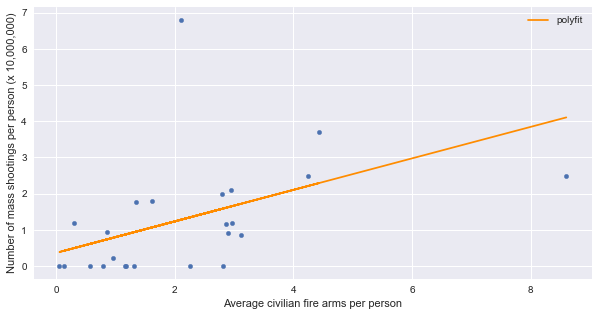

In [45]:
polyfit_coeffs = np.polyfit(df_['x'], df_['y'], 1)

fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
df_.plot.scatter(x="x", y="y", ax=ax)
ax.plot(df_.x, polyfit_coeffs[0] + polyfit_coeffs[1] * df_.x, '-', color='DarkOrange', label="polyfit")
ax.set_ylabel("Number of mass shootings per person (x 10,000,000)")
ax.set_xlabel("Average civilian fire arms per person")
pl.legend()
print ("polyfit coefficients:", polyfit_coeffs)

Figure 8: scatter plot of "Number of mass shootings per person (inflated by a factor 10,000,000) against Average number of civilian fire arms per person for all countries in the mass shootings dataset except UK. The orange line represent the best fit as calculated by numpy.polyfit. The best fit coefficients are slope: 0.37, intercept: 0.43

### Statsmodels OLS

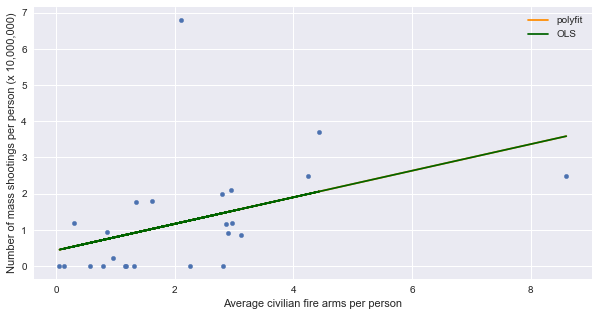

In [46]:
modelOLS = st.OLS(exog=st.add_constant(df_.x), endog=df_.y).fit()

fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
df_.plot.scatter(x="x", y="y", ax=ax)
ax.plot(df_.x, polyfit_coeffs[1] + polyfit_coeffs[0] * df_.x, '-', color='DarkOrange', label="polyfit")
ax.plot(df_.x, modelOLS.fittedvalues, color="DarkGreen", label="OLS")
ax.set_ylabel("Number of mass shootings per person (x 10,000,000)")
ax.set_xlabel("Average civilian fire arms per person")
pl.legend();


Figure 9: as figure 8, with the added ordinary least square fit line calculated by statsmodels, in green, (which unsurprisingly) conicides with the best fit by numpy polyfit

In [47]:
modelOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     4.951
Date:                Mon, 23 Oct 2017   Prob (F-statistic):             0.0366
Time:                        21:41:32   Log-Likelihood:                -42.053
No. Observations:                  24   AIC:                             88.11
Df Residuals:                      22   BIC:                             90.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.4349      0.466      0.933      0.361        -0.532     1.402
x              0.3667      0.165      2.225      0.037         0.025     0.709
==============================================================================
Omnibus:                       34.742   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.222
Skew:                           2.632   Prob(JB):                     9.42e-21
Kurtosis:                      11.032   Cond. No.                         4.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### statsmodel WLS

Note: when the number of mass shootings is 0 the error is 0. But 0 errros cannot be used as weight (cause 1/0 = infinity). Thus I am setting the error on the values Nmassshootings = 0 to 1, which is the uncertainty on Nmassshootings = 1.

('WLS coefficients:', const    1.096026
x        0.280361
dtype: float64)


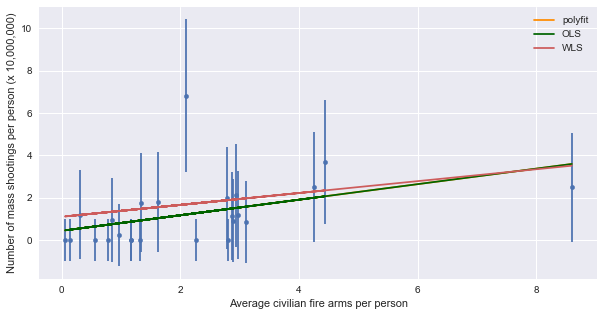

In [48]:
df_['yerr'] = np.sqrt(df_[u'Number of mass shootings'] 
                             / df_['pop'] * 1e7) + 1
df_.w = 1.0 / df_.yerr


modelWLS = st.WLS(exog=st.add_constant(df_.x), endog=df_.y,
      weights = 1.0/df_.w).fit()

fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
df_.plot.scatter(x="x", y="y", yerr=df_.yerr, ax=ax)
ax.plot(df_.x, polyfit_coeffs[1] + polyfit_coeffs[0] * df_.x, '-', color='DarkOrange', label="polyfit")
ax.plot(df_.x, modelOLS.fittedvalues, color="DarkGreen", label="OLS")
ax.plot(df_.x, modelWLS.fittedvalues, '-', color='IndianRed', label="WLS")
ax.set_ylabel("Number of mass shootings per person (x 10,000,000)")
ax.set_xlabel("Average civilian fire arms per person")
pl.legend()
print ("WLS coefficients:",  modelWLS.params)


Figure 10: as figure 8 and 9, with the added Weighted Least Square fit calculated by statsmodels.api. The uncertainties are calculated as Poisson statistics on the Number of mass shootings per person, but uncertainties on the 0 value are set to 1. The parameters are slope 0.28, intercept 1.10

In [49]:
modelWLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.090
Model:                            WLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.180
Date:                Mon, 23 Oct 2017   Prob (F-statistic):              0.154
Time:                        21:41:33   Log-Likelihood:                -48.229
No. Observations:                  24   AIC:                             100.5
Df Residuals:                      22   BIC:                             102.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.0960      0.610      1.795      0.086        -0.170     2.362
x              0.2804      0.190      1.476      0.154        -0.113     0.674
==============================================================================
Omnibus:                       45.777   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.091
Skew:                           3.422   Prob(JB):                     3.20e-42
Kurtosis:                      15.010   Cond. No.                         5.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ANALYTICAL SOLUTION

### calculate confidence intervals by hand

In [50]:
#t statistics that I need for the analytical solution
tp = sp.stats.t.ppf(0.975, len(df_.x - 1 - modelOLS.df_model))

In [51]:
def serr(x, xhat=None): 
    if xhat is None:
        return np.sqrt(((x - x.mean())**2 / (len(x) - 2)).sum())
    else: 
        return np.sqrt(((x - xhat)**2 / (len(x) - 2)).sum())
        

In [52]:
#confidence interval of each prediction
n = len(df_.x)
ci = tp * serr(df_.y, modelOLS.predict()) * np.sqrt( 1.0 / n + ((df_.x - df_.x.mean())**2 / 
                                       (n - 1) / serr(df_.x)**2))


In [53]:
modelOLS.conf_int()[0].x, modelWLS.conf_int()[0].x

(0.024914553289408836, -0.11347522877347005)

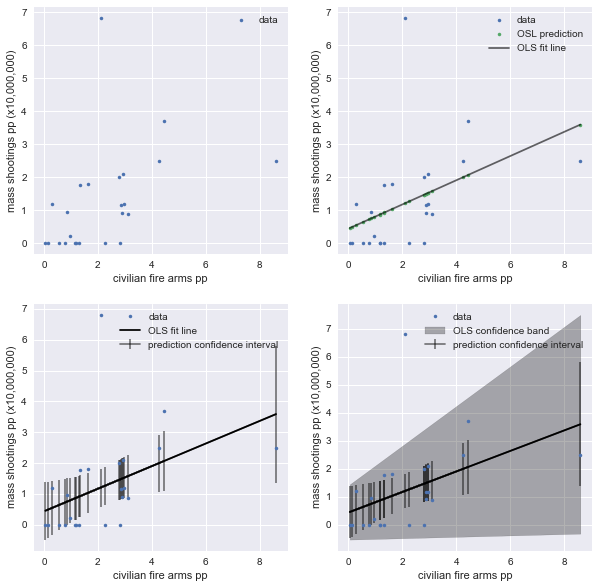

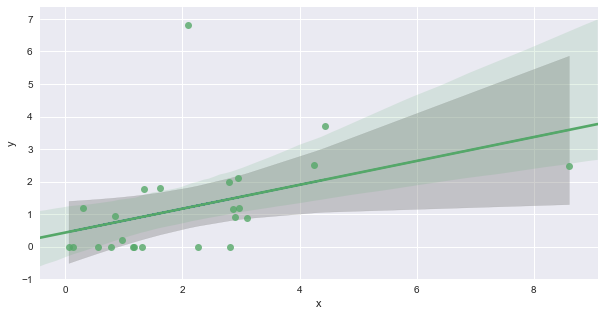

In [54]:
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.plot(df_.x, df_.y, '.', label="data")
ax.set_ylabel("mass shootings pp (x10,000,000)")
ax.set_xlabel("civilian fire arms pp")
pl.legend()


ax = fig.add_subplot(222)
ax.plot(df_.x, df_.y, '.', label="data")
ax.plot(df_.x,
        modelOLS.fittedvalues, '.', label="OSL prediction")
ax.plot([df_.x.min(), df_.x.max()],
        modelOLS.params[1] * np.array([df_.x.min(), df_.x.max()]) +
        modelOLS.params[0], 'k-', alpha=0.6, label="OLS fit line")
ax.set_ylabel("mass shootings pp (x10,000,000)")
ax.set_xlabel("civilian fire arms pp")
pl.legend()


ax = fig.add_subplot(223)
ax.plot(df_.x, df_.y, '.', label="data")
ax.plot([df_.x.min(), df_.x.max()],
        modelOLS.params[1] * np.array([df_.x.min(), df_.x.max()]) +
        modelOLS.params[0], 'k-', label="OLS fit line")
ax.errorbar(df_.x,
            modelOLS.fittedvalues, yerr=ci, 
            color='k', alpha=0.5, label="prediction confidence interval")
ax.set_ylabel("mass shootings pp (x10,000,000)")
ax.set_xlabel("civilian fire arms pp")
pl.legend()

ax = fig.add_subplot(224)
ax.plot(df_.x, df_.y, '.', label="data")
ax.plot([df_.x.min(), df_.x.max()],
        modelOLS.params[1] * np.array([df_.x.min(), df_.x.max()]) +
        modelOLS.params[0], 'k-')
ax.errorbar(df_.x,
            modelOLS.fittedvalues, yerr=ci, 
            color='k', alpha=0.5, label="prediction confidence interval")
ax.fill_between([df_.x.min(), df_.x.max()],
        (modelOLS.conf_int()[0].x) * np.array([df_.x.min(), df_.x.max()]) +
        modelOLS.conf_int()[0].const,
        (modelOLS.conf_int()[1].x) * np.array([df_.x.min(), df_.x.max()]) +
        modelOLS.conf_int()[1].const, color='k', alpha=0.3, label="OLS confidence band")
ax.set_ylabel("mass shootings pp (x10,000,000)")
ax.set_xlabel("civilian fire arms pp")
pl.legend()


xx = st.add_constant(np.sort(df_.x)) 
axsort = np.argsort(df_.x)
xsort = df_.x[axsort]
y_hat = modelOLS.predict(xx) # x is an array 

y_err = df_.y[axsort] - y_hat

mean_x = xx.T[1].mean()

nn = len(xx)
#degreed of freedom: numbr of points - number of model parameters 
dof = nn - modelOLS.df_model - 1

t = stats.t.ppf(1-0.025, df=dof)

s_err = np.sum(np.power(y_err, 2))

conf = t * np.sqrt((s_err / (nn - 2))*(1.0 / nn + (np.power((xsort - mean_x),2) / 
     ((np.sum(np.power(xsort, 2))) - nn*(np.power(mean_x, 2))))))
upper = y_hat + conf
lower = y_hat - conf
pl.figure(figsize=(10,5))
#pl.plot(df_.x, df_.y, '.')
pl.plot(df_.x,
        modelOLS.fittedvalues, '-')
pl.fill_between(df_.x[axsort], lower, upper, color='#888888', alpha=0.4, label="manual confidence")
sns.regplot(x="x", y="y", data=df_);


Figure 11: Scatter plot of mass shootings against civilian fire arms. Top  left: only the data are shown. Top right, the data and the OLS prediction and best fit line. Center left: data, best fit line, and confidence interval on the in-sample prediction, Center right: data, confidence interval on the prediction, OLS confidence region (reported by statsmodels).
Bottom panel: seaborn best line fit and seaborn confidence interval for the regression estimate ( in green) and analytical confidence intervals. 

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

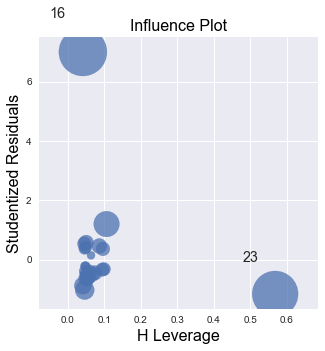

In [55]:
import statsmodels.api as sm
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

Figure 10: influence plot. The vertical position of a point indicates the magnitude of its (studentized) residuals, the x position its leverage on the best fit, and the size of the plot represents the cook's distance.
Points with high leverage: USA (label 21)
Points with high residuals: New Zealand (label 16). 

Both have high influence on the plot

In [58]:
print ("influencial observation that most affect the model")
df_.iloc[23], df_.iloc[16]

influencial observation that most affect the model


(Country                                United States
 Average total all civilian firearms          2.7e+08
 pop                                      3.13998e+08
 gdp                                      1.61553e+13
 Number of homicides by firearm                  9146
 Guns/100 inhabitants                            88.8
 Number of mass shootings                          78
 shootingspp                              0.000248409
 x                                            8.59877
 y                                            2.48409
 yerr                                          2.5761
 Name: 23, dtype: object, Country                                New Zealand
 Average total all civilian firearms         925000
 pop                                     4.4081e+06
 gdp                                    1.76193e+11
 Number of homicides by firearm                   7
 Guns/100 inhabitants                          22.6
 Number of mass shootings                         3
 shootingspp     

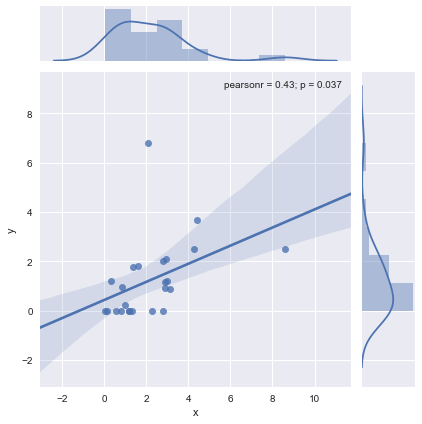

In [57]:
#Another example of a sns plot that may be insightful
# shows the distribution of points along x and y axis as a histogram, and its Kernel density estimate (KDE)
sns.jointplot(x="x", y="y", data=df_, kind="reg");


## Discuss your findings

The things I am most interested in is :
    - an understanding of the fact that incorporating  different errors and even different normalizations  may lead to different results, 
    - in the presence of outliers that influence a linear model trends should not be over-interpreted. (e.g. it is difficult to say if more fire arms lead to more mass shootings per person, due to the US being such a large outlier)